<a href="https://colab.research.google.com/github/momijizen/tensorflow-introduction/blob/main/L3_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Creating a Neural Network
Okay now you have reached the exciting part of this tutorial! No more math and complex explinations. Time to get hands on and train a very basic neural network.

As stated earlier this guide is based off of the following TensorFlow tutorial. https://www.tensorflow.org/tutorials/keras/classification

##Imports

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


##Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape) # So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

print(train_images[0,23,23])  # let's have a look at one pixel
   #Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

print(train_labels[:10])  # let's have a look at the first 10 training labels
   #Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.


(60000, 28, 28)
194
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

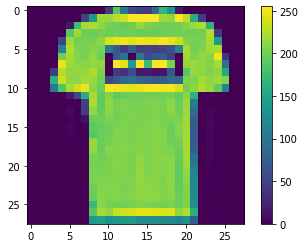

In [ ]:
# Fianlly let's look at what some of these images look like!
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing

In [ ]:
#  In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. 
# We do this because smaller values will make it easier for the model to process our values.
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (3)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (4)
    keras.layers.Dense(10, activation='softmax') # output layer (5)
])

##Compile the Model


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
N

In [ ]:
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6398 - accuracy: 0.7697
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3793 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3078 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8921


#Evaluating the Model


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8778
Test accuracy: 0.8777999877929688


##Making Predictions

In [ ]:
predictions = model.predict(test_images)
predictions[0]

array([9.8695182e-07, 2.1413869e-04, 2.9830978e-06, 7.7965724e-06,
       1.5490099e-05, 2.6707912e-03, 4.2692122e-06, 2.6126424e-02,
       5.6594349e-06, 9.7095144e-01], dtype=float32)

2
Pullover


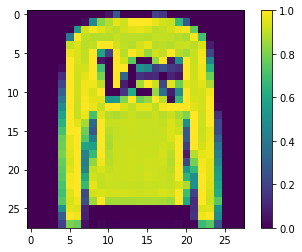

In [ ]:
print(np.argmax(predictions[1]))
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
test_labels[1] #And we can check if this is correct by looking at the value of the cooresponding test label.
print(class_names[test_labels[1]])

Pullover


##Verifying Predictions


Pick a number: 22\
Try again...
Pick a number: 88


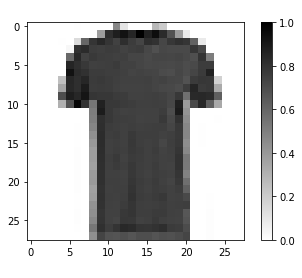

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
